# Lab 7 Information Propagation

## Due: Midnight, November 8th
In this lab, we will learn
- how to simulate independent cascade model
- how to simulate epdemic models


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save” or press Ctrl+S.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download .ipynb”
- After download is complete, Click on File, Select “Print”, and and Choose ``Save as PDF''
- Submit both the Notebook file and the PDF File as your submission for Lab 7
- Please also submit the report for Lab 7.

# 1. Preparation
We will need to use NDlib - Network Diffusion Library for information propagation. The documentation and tutorial of the package can be found from this link: https://ndlib.readthedocs.io/en/latest/

In [ ]:
!pip install ndlib

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 3.2MB 9.1MB/s 


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib as nd

# 2. Independent Cascade Model
In this section, we are going to simulate independent cascade model on a random graph. First, let's have a brief review of independent cascade model. 

In Independent Cascade Model, the node that is activated at time t, has one and only one chance, at time step t + 1, to activate its inactive neighbors. Let v be activated at time t, for any neighbor w of it, there’s a probability $p_{vw}$ that node w gets activated at time t + 1.

# 2.1 Random Graph
We will perform independent cascade model on a random graph. The edge of the random graph should have weights denoting the probability that a node will be activated by another node. For visualization, we will only generate a small graph. Otherwise, it would be time consuming to run on Google Colab.

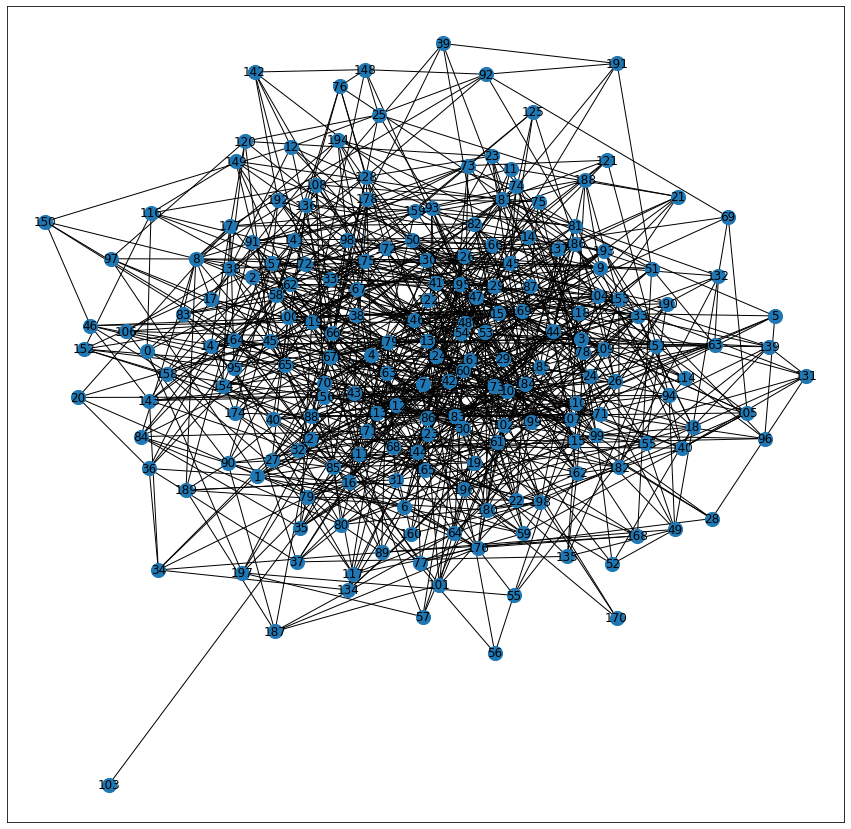

In [ ]:
# Generate a random graph with n=200 and p= 0.05
g = nx.erdos_renyi_graph(200, 0.05)

pos = nx.fruchterman_reingold_layout(g)
plt.figure(1, figsize=(15,15))
nx.draw_networkx(g, pos, with_labels=True, node_size=200)


## 2.2 Perform Independent Cascade Model
We will use ndlib.models.epidemics.IndependentCascadesModel to simulate the independent cascade model.

**Statuses**
The terminology used in ndlib for ICM is slightly different from what we discussed. During the simulation, a node can experience the following statuses, Susceptible	0, Infected	1, Removed	2. 
- Susceptible: a node is inactive
- Infected: a node is active, and can activate its neighbors in the next time stamp
- Removed: the node is infected but cannot activate others

In the visualization, we use green to denote susceptible, red to denote infected, and gray to denote removed.

For more details of ndlib.models.epidemics.IndependentCascadesModel, please refer to https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/IndependentCascades.html.

### 2.2.1 Initialize the Model

In [ ]:
# use the IndependentCascadesModel
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
model = ep.IndependentCascadesModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.01)  # this is the initial fraction of nodes that are activated/infected


# Setting the edge parameters
threshold = 0.2
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

### 2.2.2 Simulation Execution
We can call model.iteration_bunch(bunch_size) to simulate the cascading for bunch_size times. The iterations in the following code are how the status of the nodes changes in each iteration. Note that only those nodes whose status changes are included in each iteration.

In [ ]:
# Simulation execution
iterations = model.iteration_bunch(10)
print(iterations)

100%|██████████| 10/10 [00:00<00:00, 2470.73it/s]

[{'iteration': 0, 'status': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 1, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 1

### 2.2.3 Visualization
Now let's visualize how the informaiton cascade through the graph

In [ ]:
# put the label status in the history_labels
history_labels = []
labels = [0] * g.number_of_nodes()
for i in range(len(iterations)):
    for node in g.nodes():
        if node in iterations[i]['status']:
            labels[node] = iterations[i]['status'][node]
    history_labels.append(labels.copy())

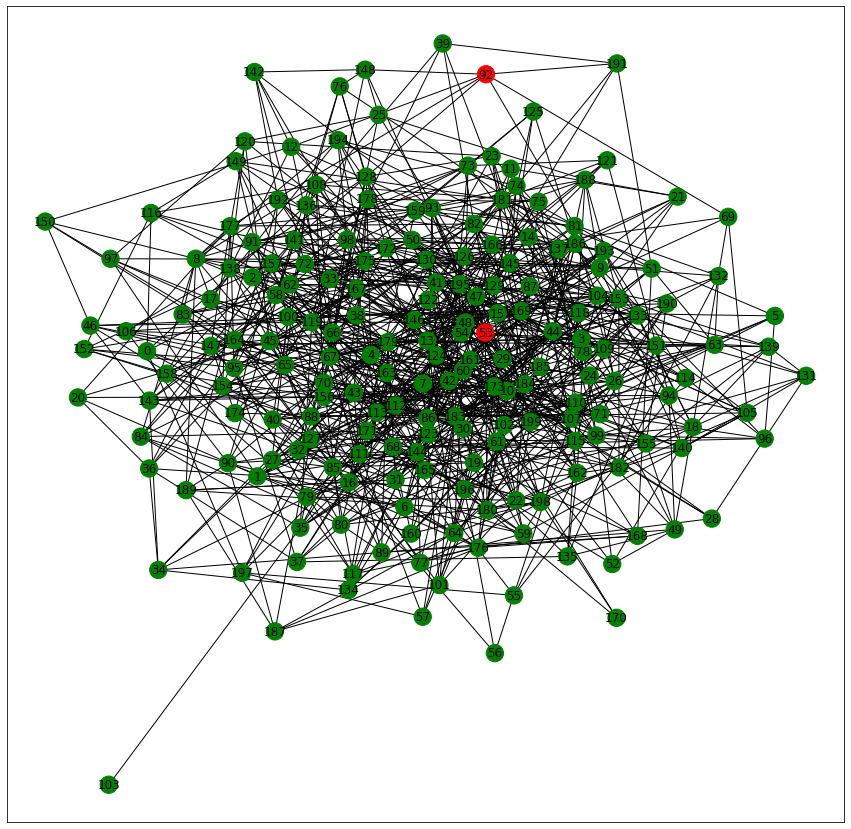

In [ ]:
# generate animation
import matplotlib.animation as animation

def plot_graph(G,pos,y,ax):
    """
    Given the graph G and pos, this function will draw a graph with node_colors as the label in y
    In our case, we use green to denote inactive, red to denote active and gray to denote removed, i.e., activated but cannot activate others
    """
    clscolors = ['green', 'red', 'gray'] # we use grean to denote susceptible, red to denote infected, and gray to denote removed
    node_colors = []
    for label in y:
        node_colors.append(clscolors[label])
    nx.draw_networkx(G, pos, node_color=node_colors,ax=ax, with_labels=True, node_size=300)

fig, ax = plt.subplots()
fig.set_size_inches(15, 15, True)

def draw_graph(i):
    plot_graph(g,pos,history_labels[i],ax)
    
# ani is the animation object
ani = animation.FuncAnimation(fig, draw_graph, frames=len(history_labels))

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# save the graph
from matplotlib.animation import PillowWriter
class LoopingPillowWriter(PillowWriter):
    def finish(self):
        self._frames[0].save(self._outfile, save_all=True, append_images=self._frames[1:], duration=int(1000 / self.fps), loop=0)
ani.save('/content/gdrive/My Drive/DS402/graph.gif', writer=LoopingPillowWriter(fps=1))

### Now you should see the gif file saved in the folder

In [ ]:
### Interactively display the animation in jupyter notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

Now you should see the animation. You can click the play button to play the animation.

## Exercise 1 Cascade Maximization
Suppose you are given a graph with edge weights as $p_{vw}$, i.e., the probability that node w will be activated by node v. You are asked to find K nodes to maximize the information propagation. Please describe how would you apply the ndlib.models.epidemics.IndependentCascadesModel to find the K nodes. Pseudo codes are encouraged. You don't need to actually implement it.

### TODO: 
• First, load a random graph with k nodes and with edge weights p.

g = nx.erdos_renyi_graph(k, p)

• Then, select the model:

model = ep.IndependentCascadesModel(g)

• Do the model configuration

config = mc.Configuration()

config.add_model_parameter()

• Setting the edge parameters

threshold = n

for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

• At last, simulation execution

iterations = model.iteration_bunch()

# 3. Epdemic Models
In this part, we will simulate the epdemic models. We will focus on SIR and SIRS. 

## 3.1 Simualting SIR Model
An SIR model is an epidemiological model that computes the theoretical number of people infected with a contagious illness in a closed population over time. The name of this class of models derives from the fact that they involve coupled equations relating the number of susceptible people S(t), number of people infected I(t), and number of people who have recovered R(t).  The equations for SIRS model is given below

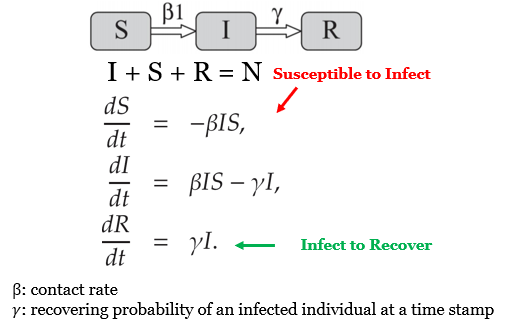



## Exercise 2 SIR Model
Please complete the code by filling the missing lines

In [ ]:
from scipy.integrate import odeint

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [ ]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I # Note that we used beta * S * I / N instead of beta * S * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

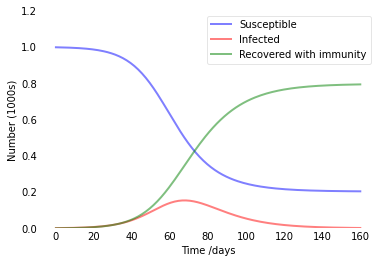

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = plt.subplot(111, axisbelow=True)
ax.grid(color='gray', linestyle='--', linewidth=1)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## 3.2 Simulating SIRS Model
The difference of SIR model with SIRS model is that, for SIR model, we assume that the individuals who have recovered will not be infected anymore; while for SIRS model, we assume that the individuals who have recovered will lose immunity after a certain period of time and will become susceptible again. The equations for SIRS model is given below

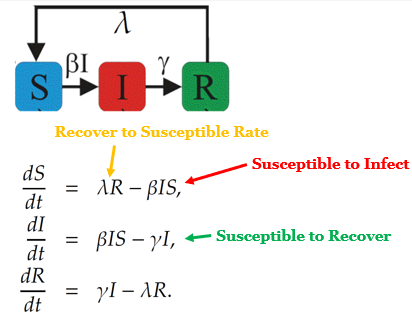

## Exercise 3 Simulate SIRS Model
Please follow the code in lecture notes and section 3.1, implement SIRS model and plot the simulation results

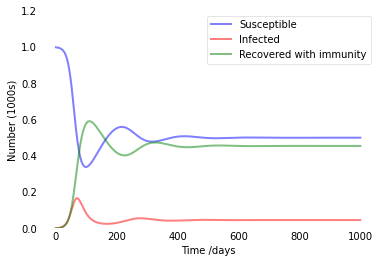

In [ ]:
N = 1000 # Total population, N.
I0, R0 = 1, 0 # Initial number of infected and recovered individuals, I0 and R0.
S0 = N - I0 - R0 # Everyone else, S0, is susceptible to infection initially.
beta, gamma, lamda = 0.2, 0.1, 0.01 # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
t = np.linspace(0, 1000, 1000) # A grid of time points (in days)

## TODO: implement SIRS and plot the simulation results
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = lamda * R - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I 
    dRdt = gamma * I - lamda * R
    return dSdt, dIdt, dRdt
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = plt.subplot(111, axisbelow=True)
ax.grid(color='gray', linestyle='--', linewidth=1)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()